# 04 Production Model and Insights

Here we will talk a bit more and visualize the usefulness of the production model that was picked: Lasso CV

- [01-Prep the Data](#section1)
- [02-Model Insights](#section2)
- [03-Recommendations](#section3)
- [04-Submission to Kaggle](#section4)

## 01-Prep the data. <a class="anchor" id="section1"></a>

In [1]:
#recall our previous variables
%store -r df
%store -r X
%store -r y
%store -r xvars

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# 02-Model Insights <a class="anchor" id="section2"></a>

In [3]:
df = pd.read_csv('./datasets/train_clean.csv',na_filter=False)
df.head(3)

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,...,0,0,NA,NA,NA,0,1,2010,WD,109000


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.25)

In [5]:
lasso_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lcv', LassoCV())
])
lasso_pipe.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()), ('lcv', LassoCV())])

In [6]:
y_preds=lasso_pipe.predict(X_train)
y_preds[:10]

array([218000.41405805, 132007.54041929, 159507.6295074 , 272329.52228844,
       141533.5286555 , 104627.02285664, 296201.91611722, 104187.72302686,
       144908.760522  , 180044.60023212])

In [7]:
y_preds.shape, y.shape

((1537,), (2050,))

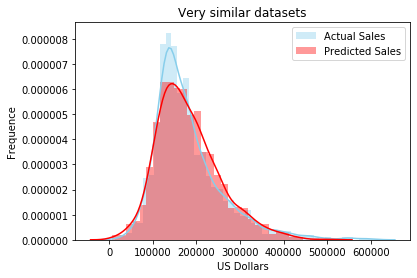

In [8]:
sns.distplot( df["SalePrice"] , color="skyblue", label="Actual Sales")
sns.distplot( y_preds, color="red", label="Predicted Sales")
plt.legend()
plt.title('Very similar datasets')
plt.xlabel("US Dollars")
plt.ylabel('Frequence');


__Conclusion:__

The Lasso CV model uses regulariztion from Lasso CV.  It had:
- testing score: 86.7% of the variation in y can be explained by the chosen X variables.
- the predictions were off, on average, by \\$28,756 which is pretty good considering the range of prices (\\$12,789 and \\$555,000).
- the predictions are fairly normally skewed for real world data.  


__Improvements?__
The model can be improved by:
- engineering more exact features representating finished vs unfinished sqft, better representation of baths vs rooms in a house, or a deeper GIS evaluation of the neighborhoods.
- the model was close to overfitting, seen by the polynomial pipelines.  Therefore, I could best improve the model by reducing the number of unnecessary columns.  So doing a better job at really refining a combination of columns would allow a polynomial reguarlization.

# 03-Recommendations: <a class="anchor" id="section3"></a>
- Which features appear to add the most value to a home? 
    - a single bath increases the value by \\$39,726, for all else being equal.
    - Northridge Heights neighborhood: Increase in value by \\$31,368.
    - Basement Exposure: a house containing a good walkout or garden level basement increases in value by \\$21,732.


- Which features hurt the value of a home the most?
    - Area per room: there is a slight positive correlation between the number of rooms in a house and sale price, but it seems like massively large rooms penalize sale price.  This number could be refined.
    -House to lot ratio: the number of amenities afforded to a house provide many positive correlations, but it seems that too big of a lot to house ratio decreases house prices.  This number could also be refined.
    
    
- What are things that homeowners could improve in their homes to increase the value?
    - Add bathrooms and rooms.  
    - Improve the basement access area.
    
    
- What neighborhoods seem like they might be a good investment?
    - The best neightborshood seems to be Northridge Heights.
    
    
- Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what data would you need from another city to make a comparable model?
    - This model is very particular to Ames because in general, people want different things in different cities.  And this model is very specific to the neighborhoods in Ames.
    - I would say a similar dataset, which can be gained by county assessor's public data, can be plugged into this model as long as the columns are changed.  But a correlation among features and SalePrice will have to re-evaulated.  

# 04-Submission to Kaggle <a class="anchor" id="section4"></a>

In [9]:
df_test = pd.read_csv('./datasets/test.csv')
df_test.shape

(878, 80)

In [10]:
df_test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [11]:
#adding dummies to the df for categorical columns that ended up as strong relationships
df_test = pd.get_dummies(df_test,columns = ['Exter Qual', 'Kitchen Qual', 'Fireplace Qu', 'Bsmt Qual','Garage Finish', 'Mas Vnr Type', 
                                  'Garage Type','Foundation', 'BsmtFin Type 1','Neighborhood', 'Exter Qual', 'Fireplace Qu',
                                  'Bsmt Exposure'],drop_first = True)
df_test.shape
df_test.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,1,0,0,0,0,0,0,1
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,1,0,0,0,0,0,0,1
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,1,0,0,1,0,0,0,0,0


In [12]:
#add all baths
df_test['allba'] = df_test['Bsmt Full Bath'] + df_test['Bsmt Half Bath'] + df_test['Full Bath'] + df_test['Half Bath']

In [13]:
#product of beds and baths
df_test['beba'] = df_test['allba'] * df_test['Bedroom AbvGr']

In [14]:
#product of TotRmsAbvGrd, baths and divide by sq feet  
df_test['area_per_room']= (df_test['TotRms AbvGrd']*df_test['allba'])/(df_test['BsmtFin SF 1'] + df_test['BsmtFin SF 2'] + df_test['Gr Liv Area'])

In [15]:
# finished sqft of house
df_test['fin_sqft'] = df_test['BsmtFin SF 1'] + df_test['BsmtFin SF 2'] + df_test['Gr Liv Area']

In [16]:
#finished sqft of house / total lot size
df_test['house_to_lot_ratio'] = df_test['fin_sqft']/ df_test['Lot Area']

In [17]:
#since we used 3 columns added to define the finished sqft of a house, we are dropping columns to reduce collinearity
df_test.drop(columns=['BsmtFin SF 1','BsmtFin SF 2','Gr Liv Area'],inplace=True)

In [18]:
#since we used all the bath columns to create allba, we will drop the bath columns to reduce collinearity
df_test.drop(columns = ['Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath'],inplace=True)

In [19]:
xvars = ['Overall Qual', 'Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','TotRms AbvGrd','Fireplaces',
         'Exter Qual_TA', 'Kitchen Qual_TA', 'Bsmt Qual_TA','Garage Finish_Unf', 'Mas Vnr Type_None', 'Garage Type_Detchd',
         'Foundation_PConc', 'BsmtFin Type 1_GLQ', 'Neighborhood_NridgHt','Exter Qual_Gd', 'Fireplace Qu_Gd', 'Bsmt Exposure_Gd','allba','beba','area_per_room',
          'fin_sqft','house_to_lot_ratio']

In [20]:
df_test.shape

(878, 138)

In [21]:
df_copy = df_test
df_test = df_test[xvars]
df_test.shape

(878, 27)

In [24]:
kaggle_preds=lasso_pipe.predict(df_test)
kaggle_preds[:10]

array([168058.58745623, 180373.7717568 , 226773.48751341, 115197.70338832,
       192591.33238005,  65729.42177477,  82627.95960886, 122986.78617138,
       194219.55059621, 179416.67960746])

In [25]:
#create a dictionary from preds
submission = pd.DataFrame({
    "Id":df_copy['Id'],
    'SalePrice':kaggle_preds
    
})

In [26]:
submission.to_csv('submissions/submission_Lasso.csv',index=False)